In [2]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import jsonfix
from pprint import pprint
import scipy.signal


In [43]:
data = jsonfix.fix_json("D:\\Research\\jordan.json")

lifeLog = data['lifeLog']

In [44]:
cal = []
for k in lifeLog:
    for r in lifeLog[k]["mobile"].values():
        if r == None:
            continue
        if "calendar" in r:
            for j in r["calendar"]["labeledCalendar"]:
                cal.append([j["event"], j["location"], j["startTime"], k, r['time']['timeWindow']])
    

In [45]:
tmp = set()
cal_filtered = []
for event in cal:
    if tuple(event[:4]) not in tmp:
        cal_filtered.append(event)
        tmp.add(tuple(event[:4]))
        
cal = cal_filtered

In [46]:
for event in cal:
    print(event)
    name,location,startTime,date,window_str = event
    
    window = int(window_str[9:])
    seg_window = 0

    if date in data['segment']:
        segment_keys = sorted(list(data['segment'][date].keys()))

        for index, i in enumerate(segment_keys):
            if int(i) > window:
                seg_window = segment_keys[index-1]
                #technically, this should be the previous day's info. However, there are a lot of potential problems here:
                #gaps in data, start of collection day, etc. Also makes it much harder to change kmeans features right now
                prev_window = segment_keys[index-2] if index-2 >= 0 else "1"
                next_window = segment_keys[index]
                event.append(prev_window)
                event.append(seg_window)
                event.append(next_window)
                break


["이승만's birthday", '', 100915200000, '0314_2018', '20180314_127']
['lab meeting', '', 1521061200000, '0314_2018', '20180314_174']
['Talk at DBH5011', '', 1521135000000, '0315_2018', '20180315_127']
['MIT Talk in 6011', '', 1521154800000, '0315_2018', '20180315_193']
["임채윤's birthday", '', 1363392000000, '0315_2018', '20180315_205']
["임채윤's birthday", '', 1363392000000, '0316_2018', '20180316_1']
['Monday, March 19, 1:15 PM Wife Hospital', '', 1521490500000, '0319_2018', '20180319_160']
['Monday, March 19, 1:15 PM Wife Hospital', '', 1521492300000, '0319_2018', '20180319_172']
['Tuesday, March 20, 11:45 AM Meeting Ramesh', '', 1521571500000, '0320_2018', '20180320_142']
['student demo', '', 1521574200000, '0320_2018', '20180320_151']
['Final Exam Proctor', '', 1521586800000, '0320_2018', '20180320_193']
['lab meeting', '', 1515619800000, '0321_2018', '20180321_163']
['Persistent Mneeting', '', 1521750600000, '0322_2018', '20180322_163']
["조경택's birthday", '', 511920000000, '0322_2018', 

[0: Title,<br>
 1: location, <br>
 2: start time(unix), <br>
 3: date, <br>
 4: event time window string, <br>
 5: prev window string, <br>
 6: segment window string,<br>
 7: next window string]

In [48]:
avg_steps = []
plt.xlabel('time')
steps_arr = []
for event in cal:
    if len(event) == 8:
        if 'step' in data['segment'][event[3]][event[6]] and \
                    data['segment'][event[3]][event[6]]["dailyActivitySet"][0]['KEY_DAILYACTIVITY'] == 'working':
            steps_during_meeting = data['segment'][event[3]][event[6]]['step'][(int(event[6])-int(event[4][9:]))*5:]
            smoothed_steps = scipy.signal.savgol_filter(steps_during_meeting, 3, 2)
            steps_arr.append(smoothed_steps)
            #avg_steps.append(np.mean(data['segment'][event[3]][event[5]]['step'][-3:] + data['segment'][event[3]][event[6]]['step'][:3]))
#avg_steps = np.array(avg_steps)


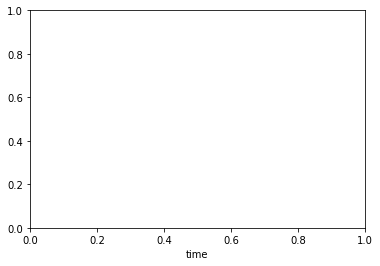

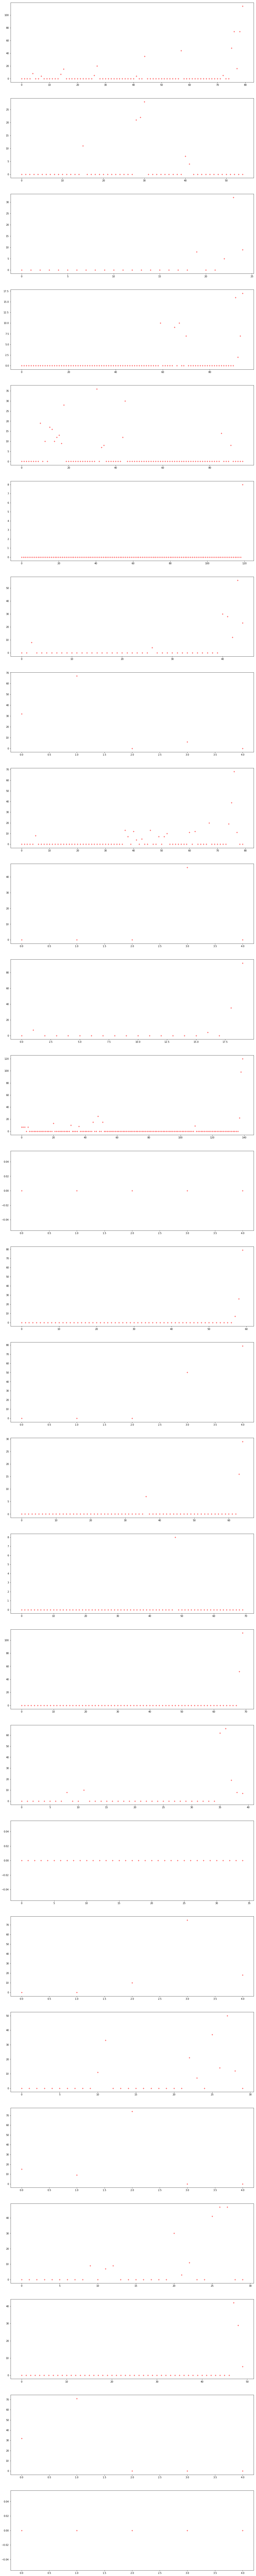

In [49]:
#plt.hist(avg_steps)
fig, axarr = plt.subplots(len(steps_arr))
index = 0
fig.set_size_inches(18.5, 200.5)
for i in steps_arr:
    axarr[index].plot(i,'r+')
    index += 1


plt.show()

In [50]:
pprint(data['segment']['0202_2018']["180"])

KeyError: '0202_2018'